#### Read libraries

In [277]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read dataset

In [278]:
 df = pd.read_csv('zomato.csv')

In [279]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [280]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

####  Find % of missing.values

In [281]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [282]:
#list_comprehension to return feature_na.

features_na = [features for features in df.columns if df[features].isnull().sum()>0]

In [283]:
features_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [284]:
### calculate % of missing values.

for features in features_na:
    print(' {} has {} missing values'.format(features,np.round(df[features].isnull().sum()/len(df)*100,6)))

 rate has 15.033741 missing values
 phone has 2.335789 missing values
 location has 0.040606 missing values
 rest_type has 0.438927 missing values
 dish_liked has 54.291626 missing values
 cuisines has 0.087012 missing values
 approx_cost(for two people) has 0.669026 missing values


In [285]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [286]:
#dropna in rate column
df.dropna(axis='index',subset=['rate'], inplace=True)

In [287]:
## write  a fucntion to drop all the slash(/) in rate column
def split(x):
    return x.split('/')[0]

In [288]:
## apply function to drop the slash(/) in the rate column
df['rate'] = df['rate'].apply(split)

In [289]:
## check to see if (/) is removed from the rate columns
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [290]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [291]:
##replace the 'new' with 0.
df.replace('NEW',0,inplace=True)

In [292]:
## replace the '-' with 0
df.replace('-',0,inplace=True)

In [293]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [294]:
#check and change type to float.

df['rate'].dtype

dtype('O')

In [295]:
df['rate'] = df['rate'].astype(float)

In [296]:
df['rate'].dtypes

dtype('float64')

In [297]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Cal. Avg Rating of each Restaurant.

In [298]:
#group the mean of the Restuarant from names and rate columns

df_rate = df.groupby('name')['rate'].mean()
df_rate

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

In [299]:
#Save to a new Df and reset index

df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [300]:
#Resent Default columns to restuarant and avg_rating

df_rate.columns = ['restuarant','avg_rating']

df_rate.head(20)

,restuarant,avg_rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


#### Get Distributions of Rating Column & try to find out what Distribution this Feature Support.

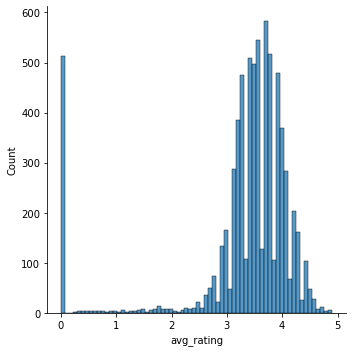

In [301]:
sns.displot(df_rate['avg_rating'])

## Most of the Restaurant has there Rating between 3 and 4.
## other Restaurants has 0 rating because the NEW has been replaced with 0.

####  Top Restaurants Chains in Bangalore. 

In [302]:
chains = df['name'].value_counts()[0:20]
chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Just Bake              68
Five Star Chicken      68
Kanti Sweets           68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Sweet Truth            60
Domino's Pizza         60
KFC                    60
Beijing Bites          60
McDonald's             59
Smoor                  59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 0, 'Number of Outlets')

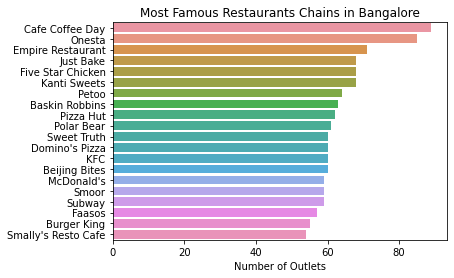

In [303]:
sns.barplot(x= chains, y=chains.index)
plt.title('Most Famous Restaurants Chains in Bangalore')
plt.xlabel('Number of Outlets')

####  How many of the Restuarants Do Not  Accep Online Orders . 

In [304]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [305]:
x = df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [306]:
labels = ['Not Accepted', 'Accepted']

In [307]:
import plotly.express as px

In [308]:
px.pie(df, values=x, labels=label,title='Online Order')

#### Ratio Between Restauarants that Provide Table and Restaurants that do not Provide Table.

In [309]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [310]:
x = df['book_table'].value_counts()
x 

No     37509
Yes     6433
Name: book_table, dtype: int64

In [311]:
labels = ['Do not book_table','book_table']

In [312]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [313]:
trace = go.Pie(labels=labels, values=x, hoverinfo='label+percent', textinfo='value')
iplot([trace])

 #### Indept  Analysis on Types of Restaurants we have.

In [314]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [315]:
df['rest_type'].isna().sum()

151

In [324]:
df['rest_type'].dropna(inplace=True)

In [321]:
len(df['rest_type'].unique())

88

In [322]:
trace1 = go.Bar(x = df['rest_type'].value_counts().nlargest(20).index, y= df['rest_type'].value_counts().nlargest(20)) 


In [323]:
iplot([trace1])

## besically snacks takes the lead.

#### Highest Voted Restaurants

In [325]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [326]:
df.groupby('name')['votes'].sum().nlargest(20)

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Arbor Brewing Company           92362
House Of Commons                90573
Chutney Chang                   89910
Fenny's Lounge And Kitchen      89183
AB's - Absolute Barbecues       86418
Church Street Social            83179
Prost Brew Pub                  78609
The Biere Club                  76649
Stoner                          75194
Koramangala Social              75021
Name: votes, dtype: int64

In [327]:
trace3 = go.Bar(x= df.groupby('name')['votes'].sum().nlargest(20).index, 
       y = df.groupby('name')['votes'].sum().nlargest(20))

In [328]:
iplot([trace3])

#### Total Restaurants at different locations in Bangalore.

In [350]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [363]:
## create two empty list to store Rest.names count and Rest.locations

restaurants_count = []
location = []

for key, location_df in df.groupby('location'):
    location.append(key)
    restaurants_count.append(len(location_df['name'].unique()))

In [364]:
## Create a new df to store the created list above.

df_total = pd.DataFrame(zip(location,restaurants_count))
df_total.head()

,0,1
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [365]:
## renam_columns
df_total.columns = ['location','restaurants_count']
df_total.head()

,location,restaurants_count
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [366]:
## set location as index
df_total.set_index('location', inplace=True)
df_total.head()

,restaurants_count
location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


In [367]:
## resturn location with highest number of rest_name_count.

df_total.sort_values(by='restaurants_count').tail(10)

,restaurants_count
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<AxesSubplot:xlabel='location'>

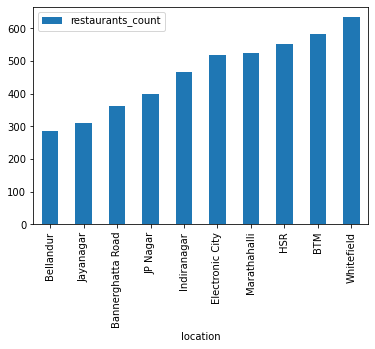

In [369]:
## visualize
df_total.sort_values(by='restaurants_count').tail(10).plot.bar()